In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Stats testing
- T-tests
- ANOVA testing


#### Goals
- Describe what they are
- Example of use
- When to use one or the other

#### Links
- ANOVA(5min) https://www.youtube.com/watch?v=ITf4vHhyGpc
- ANOVA (13mins crashcourse) https://www.youtube.com/watch?v=oOuu8IBd-yo
- T-test (11min crashcourse): https://www.youtube.com/watch?v=AGh66ZPpOSQ

Reference for later. CrashCourse: https://www.youtube.com/playlist?list=PL8dPuuaLjXtNM_Y-bUAhblSAdWRnmBUcr

------


#### Null Hypothesis
Null Hypothesis: (example) Mean reaction time for each group is the same.
- Accept the null hypothesis if the numbers look the same across groups
- Reject null hypothesis if the groups look different

------



## T-Test
- Used to compare 2 cases
- Tell us how many standard errors away from the mean our observed difference is.

### Process
Have X number of people try coffee from 2 shops. 
- Null $H_0$: No difference between shops
- Two sample t-test Test Statistic =  (observed data - What we expect if null is true) / Ave variation
    * = 0.3 - 0 / ave variation
    * Ave variation: standard error of the difference scores
    
    
1. **Calculate critical t-value**, if t-stat is greater than crit value we REJECT the null hypothesis ( we think they're different).
2. **Calculate p-value** from t-stat and we can reject the null hypothes if p-value is smaller than our chosen alpha level (usually 0.05 - long run only 5% of tests in long run will be wrong).

Use a computer to compute the T-distribution. Looks like a normal curve. The cut offs are the top/bottom of the blue area. If our data falls within the blue section, we DO NOT reject the null hypothesis. The data isn't different enough to say the 2 coffee places are different. (2-tailed test)

P-value calculated was **0.6684**. Our comparison was **0.05**. We DO NOT reject the null because 0.6684 > 0.05.

#### Normal Distribution Curve
- 68% of data between 1 std
- 95% of data between 2 std
- 99.7% of data between 3 std

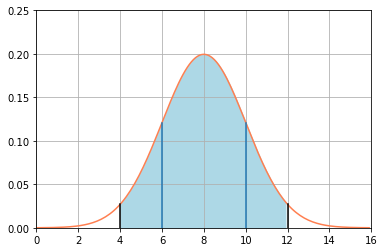

In [36]:
plot_normal_distribution()

#### Paired T-test
**Problem**: We need to take into account differences between people's opinions. Random assignment adds variation. So someone who just doesn't like coffee is always going to rate lower than a coffee lover. 

**Solution**: Pair up people with similar opinions.
- Have each person try both. This removed variation due to diff of people's opinions.

This will make people's scores look more similar between this matched pairs t-test and the 1-sample t-test which is a simpler variation

------

## ANOVA
Analysis of Variance 

- Used to compare 3 or more
- Variance within each group and variance between groups (water, orange juice, and coffee) 

$$F = \frac{between \quad group}{within \quad groups}$$
Larger the F (diff between) greater chance we can reject the null hypothsis.

$$F(b,w)$$
- **b**: (number of groups - 1): degrees of freedom for var between groups. (between water, coffee, and tea)
- **w**: (total number of observations - number of groups):  degrees of freedom for var within groups (Just looking water)


#### Kaggle dataset on Chocolate: Cacao beans

**General Linear Model**: Data = Model + Error


* SST Sum of square total (Sum of squares between each rating and the mean overall)
* SST = N * Variance

Split the variation for data = model + error
- (SSM) Model sums of square : Sum up differences in each group between the group mean and the values in the group. 
- (SSE) Sum of sqaures for error: How much variation is not not explained by model.

$$F-static = \frac{MSE_{model}}{MSE_{error}}$$

- $MSE_{model} = \frac{SSM}{k-1}$ Degrees of freedom for categorical variables
    * **k** = # of categories
- $MSE_{error} = \frac{SSM}{n-k}$ Degrees of freedom for errors
    * **n** = number of samples



#### F-stastic:
Contains many items or groups. 

Do 3 different t-tests (between each cacoa bean type). You should do a correction for multiple comparisons. 

-------


### Potato study!
- **k=12** types of potatoes
- **n=252** examples

![ANOVA TABLE](./pics/anova_table_potato)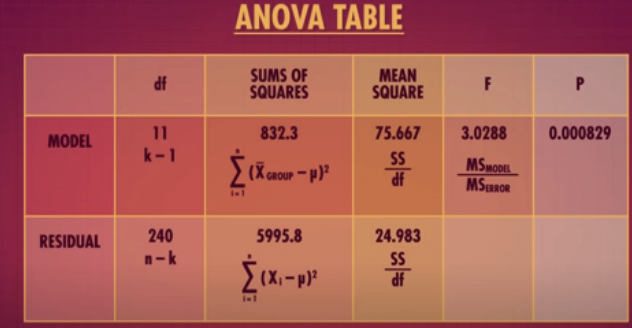

Since it is an omnibus test, we just know there **is** a difference between some of the potatoes). Then, we know we should look for a difference. P-value is super small
- **Omnibus test** designed to detect any of a broad range of departures from a specific null hypothesis. 

ANOVA and regression user Linear Model form. 
- ANOVA says best guess is the mean rating for group



In [7]:
from scipy.stats import norm

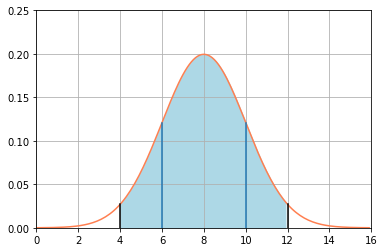

In [35]:
def plot_normal_distribution():

    x_min = 0.0
    x_max = 16.0

    mean = 8.0 
    std = 2.0

    x = np.arange(x_min, x_max, 0.1)

    y = norm.pdf(x, mean, std)

    plt.plot(x, y, color='coral')
    plt.grid()


    plt.xlim(x_min,x_max)
    plt.ylim(0,0.25)

    # First standard deviation
    plt.axvline(mean+std, ymax=4* norm.pdf(mean+std, mean, std))
    plt.axvline(mean-std, ymax=4*norm.pdf(mean-std, mean, std))

    # Second standard deviation( )

    plt.axvline(mean+ 2*std, 
                ymax=4*norm.pdf(mean+ 2*std, mean, std), 
                color='black')
    plt.axvline(mean- 2*std, 
                ymax=4*norm.pdf(mean- 2*std, mean, std),
               color='black')

    middle_95th_percentile = np.arange(mean- 2*std, mean+ 2*std, 0.1)
    y_95th = norm.pdf(middle_95th_percentile, mean, std)
    plt.fill_between(x=middle_95th_percentile,
                    y1=0, y2=y_95th, color="lightblue")
plot_normal_distribution()